## 第三章 模型搭建和评估--建模

经过前面的两章的知识点的学习，我可以对数数据的本身进行处理，比如数据本身的增删查补，还可以做必要的清洗工作。那么下面我们就要开始使用我们前面处理好的数据了。这一章我们要做的就是使用数据，我们做数据分析的目的也就是，运用我们的数据以及结合我的业务来得到某些我们需要知道的结果。那么分析的第一步就是建模，搭建一个预测模型或者其他模型；我们从这个模型的到结果之后，我们要分析我的模型是不是足够的可靠，那我就需要评估这个模型。今天我们学习建模，下一节我们学习评估。

我们拥有的泰坦尼克号的数据集，那么我们这次的目的就是，完成泰坦尼克号存活预测这个任务。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小
from sklearn.model_selection import train_test_split

In [2]:
#写入代码
df = pd.read_csv('train.csv',names=['乘客ID','是否幸存','乘客等级(1/2/3等舱位)','乘客姓名','性别','年龄',
                                      '堂兄弟/妹个数','父母与小孩个数','船票信息','票价','客舱','登船港口'],
                               index_col = '乘客ID',
                               header = 0)
df.head()

,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 模型搭建

In [3]:
#写入代码
X = df.iloc[:,1:]
y = df['是否幸存']

In [4]:
#写入代码
X.head()

,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#写入代码
y.head()

乘客ID
1    0
2    1
3    1
4    1
5    0
Name: 是否幸存, dtype: int64

In [6]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [7]:
X_train.head()

,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
乘客ID,,,,,,,,,,
672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.000,B71,S
418,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.000,NaN,S
635,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.900,NaN,S
324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.000,NaN,S
380,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.775,NaN,S


In [8]:
X_train = X_train.copy()
X_train.loc[X_train.index,'y'] = y_train
X_train

,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口,y
乘客ID,,,,,,,,,,,
672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0
418,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,1
635,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,0
324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S,1
380,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
132,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,0
491,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S,0
529,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S,0


# EDA

## 缺失值处理

In [9]:
null_cnt = pd.DataFrame({'null_cnt':X_train.isnull().sum(),'cnt':len(X_train),'null_pct':X_train.isnull().sum()/len(X_train)})

In [10]:
null_cnt

,null_cnt,cnt,null_pct
乘客等级(1/2/3等舱位),0,668,0.000000
乘客姓名,0,668,0.000000
性别,0,668,0.000000
年龄,136,668,0.203593
堂兄弟/妹个数,0,668,0.000000
父母与小孩个数,0,668,0.000000
船票信息,0,668,0.000000
票价,0,668,0.000000
客舱,515,668,0.770958
登船港口,2,668,0.002994


In [11]:
age_null = X_train[X_train['年龄'].isnull()]
age_null.head()

,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口,y
乘客ID,,,,,,,,,,,
251,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.25,NaN,S,0
741,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.00,D45,S,1
88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.05,NaN,S,0
640,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.10,NaN,S,0
847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,0


In [12]:
age_null.groupby('乘客等级(1/2/3等舱位)').agg({'乘客等级(1/2/3等舱位)':np.count_nonzero})

,乘客等级(1/2/3等舱位)
乘客等级(1/2/3等舱位),
1,23
2,9
3,104


In [13]:
age_fillna = X_train[X_train['年龄'].notnull()].groupby('乘客等级(1/2/3等舱位)').agg({'年龄':np.mean})
age_fillna

,年龄
乘客等级(1/2/3等舱位),
1,38.530909
2,29.892362
3,24.983473


In [14]:
for i in range(len(X_train)):
    if pd.isnull(X_train.iloc[i,3]):
        if X_train.iloc[i,0] == 1:
            X_train.iloc[i,3] = age_fillna.loc[1,'年龄']
        elif X_train.iloc[i,0] == 2:
            X_train.iloc[i,3] = age_fillna.loc[2,'年龄']
        elif X_train.iloc[i,0] == 3:
            X_train.iloc[i,3] = age_fillna.loc[3,'年龄']

In [15]:
pd.DataFrame({'null_cnt':X_train.isnull().sum(),'cnt':len(X_train),'null_pct':X_train.isnull().sum()/len(X_train)})

,null_cnt,cnt,null_pct
乘客等级(1/2/3等舱位),0,668,0.000000
乘客姓名,0,668,0.000000
性别,0,668,0.000000
年龄,0,668,0.000000
堂兄弟/妹个数,0,668,0.000000
父母与小孩个数,0,668,0.000000
船票信息,0,668,0.000000
票价,0,668,0.000000
客舱,515,668,0.770958
登船港口,2,668,0.002994


In [16]:
kc = pd.DataFrame({'客舱':X_train[X_train['客舱'].notnull()]['客舱'].str[:1],'y':X_train[X_train['客舱'].notnull()]['y']})

In [17]:
xcrs = kc.groupby('客舱').agg({'y':np.sum})
zrs = kc.groupby('客舱').agg({'客舱':np.count_nonzero})
xcrs['y']/zrs['客舱']

客舱
A    0.250000
B    0.720930
C    0.600000
D    0.703704
E    0.750000
F    0.666667
G    0.333333
T    0.000000
dtype: float64

In [18]:
X_train

,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口,y
乘客ID,,,,,,,,,,,
672,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,0
418,2,"Silven, Miss. Lyyli Karoliina",female,18.000000,0,2,250652,13.0000,NaN,S,1
635,3,"Skoog, Miss. Mabel",female,9.000000,3,2,347088,27.9000,NaN,S,0
324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.000000,1,1,248738,29.0000,NaN,S,1
380,3,"Gustafsson, Mr. Karl Gideon",male,19.000000,0,0,347069,7.7750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
132,3,"Coelho, Mr. Domingos Fernandeo",male,20.000000,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,0
491,3,"Hagland, Mr. Konrad Mathias Reiersen",male,24.983473,1,0,65304,19.9667,NaN,S,0
529,3,"Salonen, Mr. Johan Werner",male,39.000000,0,0,3101296,7.9250,NaN,S,0


In [20]:
X_train = X_train.drop(['乘客姓名','船票信息','登船港口','y'],axis = 1)

In [21]:
X_train.客舱 = X_train.客舱.apply(lambda x:str(x)[:1] if not pd.isna(x) else x)

In [33]:
X_train['乘客等级(1/2/3等舱位)'] = X_train['乘客等级(1/2/3等舱位)'].apply(lambda x:str(x) if not pd.isna(x) else x)

In [35]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import matplotlib.pyplot as plt
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, method = 'dp',n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    # 这里要求分箱的迭代结果是完全线性相关的，可能存在优化的机会
    while np.abs(r) < 1:
        try:
            '''
                # 等频分箱 pd.qcut(value_list, q = n)
                # 等距分箱 pd.cut(value_list, bins = n)
            '''
            if method == 'dp':
                d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            elif method == 'dj':
                d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, n)})
            
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT+0.0001)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT+0.0001)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df, target,method = 'dp'):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):         
            
            if np.issubdtype(df[i], np.number) and len(Series.unique(df[i])) > 2:
                conv = mono_bin(target, df[i],method = method)
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df[i])
                conv["VAR_NAME"] = i     
                count = count + 1
                
            x_label = conv.MIN_VALUE.apply(lambda x:str(x)) + '-' + conv.MAX_VALUE.apply(lambda x:str(x))
            plt.bar(x_label, conv['WOE'])
            plt.title(i)
            plt.show()
            
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

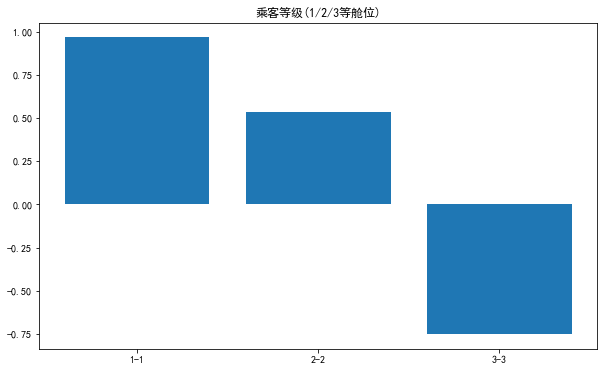

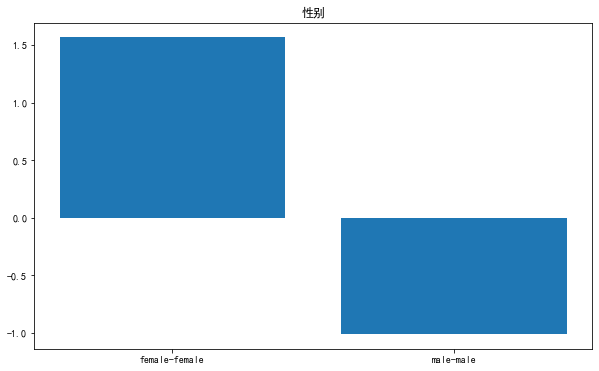

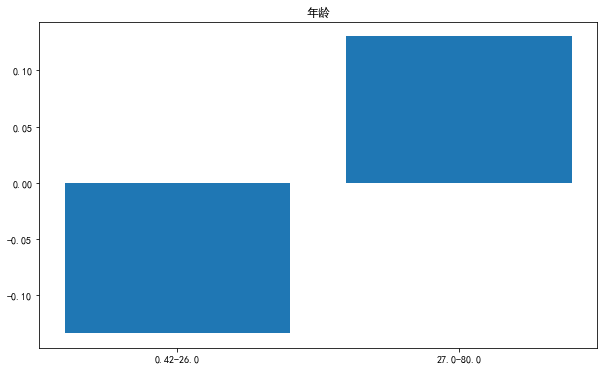

D:\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


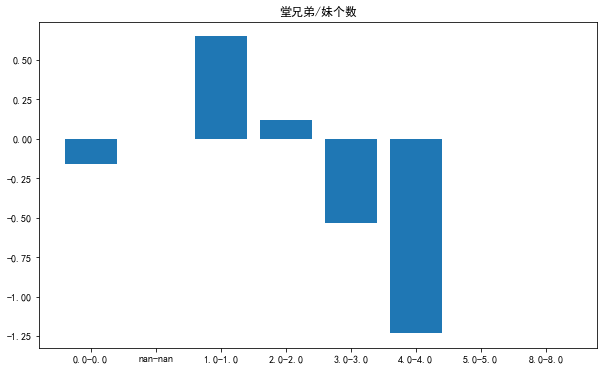

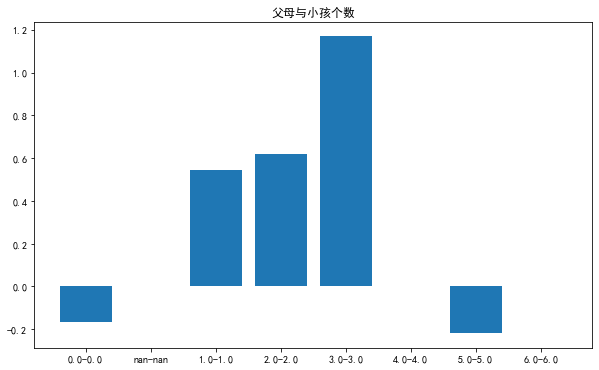

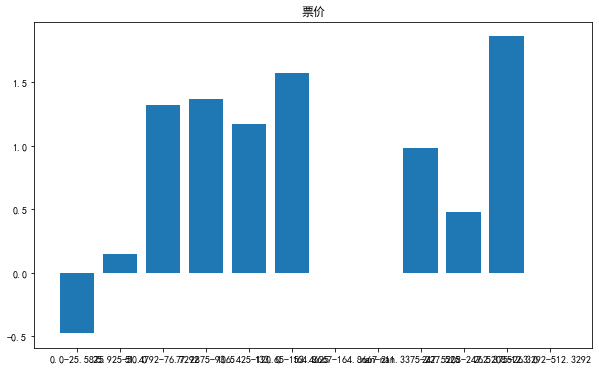

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1416/500711861.py:104: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1416/500711861.py:105: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT


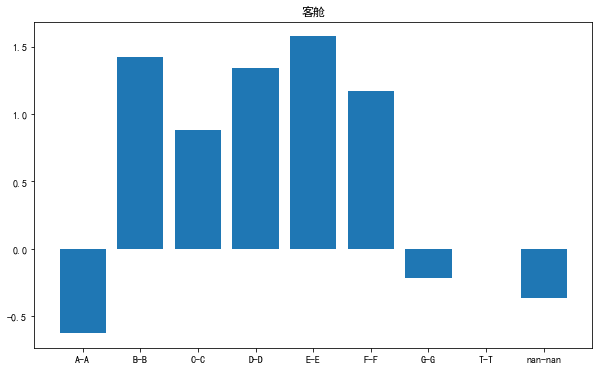

In [36]:
final_iv, IV = data_vars(X_train,y_train,method = 'dj')

In [37]:
final_iv.head(20)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,乘客等级(1/2/3等舱位),1,1,166,103,0.620482,63,0.379518,0.402344,0.152913,0.967440,0.574155
1,乘客等级(1/2/3等舱位),2,2,136,70,0.514706,66,0.485294,0.273438,0.160194,0.534686,0.574155
2,乘客等级(1/2/3等舱位),3,3,366,83,0.226776,283,0.773224,0.324219,0.686893,-0.750760,0.574155
3,性别,female,female,235,176,0.748936,59,0.251064,0.687500,0.143204,1.568792,1.402780
4,性别,male,male,433,80,0.184758,353,0.815242,0.312500,0.856796,-1.008596,1.402780
5,年龄,0.42,26.0,335,118,0.352239,217,0.647761,0.460938,0.526699,-0.133367,0.017326
6,年龄,27.0,80.0,333,138,0.414414,195,0.585586,0.539062,0.473301,0.130100,0.017326
7,堂兄弟/妹个数,0.0,0.0,462,160,0.346320,302,0.653680,0.625000,0.733010,-0.159407,0.146444
8,堂兄弟/妹个数,NaN,NaN,0,0,NaN,0,NaN,0.000000,0.000000,NaN,0.146444
9,堂兄弟/妹个数,1.0,1.0,153,83,0.542484,70,0.457516,0.324219,0.169903,0.646191,0.146444
